 ## Importing necessary libraries

In [1]:
# !pip install pandasql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [3]:
df1 = pd.read_csv("Table S1.csv", skiprows=1, header = 0)
df2 = pd.read_csv("Table S2.csv", skiprows=1, header = 0)
df3 = pd.read_csv("Table S3.csv", skiprows=1, header = 0)

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2988, 28)
(418, 24)
(52, 25)


### Checking for class imbalance

In [5]:
df1['Comment'].value_counts()

Barren       1687
Fertility    1301
Name: Comment, dtype: int64

In [6]:
# sampling the data
df1.sample(3)

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
283,[21362] GAO PENG (2016),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,26.0000,114.0000,GRANITE,235.000000,NaN,Barren,0,9.509056,...,49.419359,17.665277,82.772841,17.15131,180.105791,31.326292,567.417518,11089.82294,144.49180,141.848393
865,[22019] HEINONEN A. P. (2017),BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...,60.8859,26.6534,"GRANITE, RAPAKIVI",1645.927665,NaN,Barren,0,15.830000,...,56.320000,21.300000,101.290000,21.28000,190.450000,35.470000,627.370000,11511.76000,86.05007,31.202435
1094,[22246] XI FUWEI (2018),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,29.3731,88.0483,GRANODIORITE,175.500000,NaN,Barren,0,4.420000,...,35.550000,19.170000,113.500000,32.82000,420.160000,110.610000,695.870000,10349.24000,377.00000,365.000000


In [7]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [8]:
df2.columns

Index(['Sample No.', 'Rock type', 'Zricon ID', 'Age', 'Ti', 'Ce', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [9]:
df2.sample(3)

,Sample No.,Rock type,Zricon ID,Age,Ti,Ce,Nd,Sm,Eu,Gd,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
341,SM061,Salt & pepper Bethsaida,RLP1L7-12,208.15,4.7,42.20,0.65,2.49,0.61,22.0,...,70.90,700.0,151.0,2020.0,10230,4633.009341,0.213435,0.000106,64.923077,0.032140
108,SM056,Bethlehem porphyry,RLP2L6-11,209.00,6.0,9.31,0.82,2.14,0.59,10.5,...,18.40,181.3,38.3,529.0,9120,325.561055,0.349258,0.000660,11.353659,0.021462
105,SM056,Bethlehem porphyry,RLP2L6-9,209.00,3.8,7.23,1.05,2.11,0.80,8.9,...,16.05,171.5,43.1,403.0,10310,214.275129,0.506571,0.001257,6.885714,0.017086


In [10]:
df3.columns

Index(['Sample', 'Analysis number', 'Location', 'Age (Ma)', 'Ti', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [11]:
df3.sample(3)

,Sample,Analysis number,Location,Age (Ma),Ti,Ce,Pr,Nd,Sm,Eu,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
14,KMQ-12-2,KMQ12-2_2,Kangmaqie,51,18.873308,13.38,0.2914,5.623,12.27,1.832,...,54.68,484.6,75.99,2003.0,9433.788599,31.647266,0.205384,0.000103,2.379513,0.001188
16,KMQ-12-2,KMQ12-2_4,Kangmaqie,51,25.340218,25.54,0.6887,11.710,27.21,4.334,...,94.33,744.5,107.60,3899.0,8839.353919,20.822709,0.247605,0.000063,2.181042,0.000559
13,KMQ-12-2,KMQ12-2_1,Kangmaqie,51,21.294653,23.33,0.5206,8.572,19.66,2.606,...,91.37,679.7,92.02,3245.0,9222.641330,31.096172,0.186686,0.000058,2.721652,0.000839


### Analysing the column Sample No in dataframes 2 and 3.

In [12]:
df2['Sample No.'].value_counts()

MA026    57
SM060    46
SM061    39
MA121    30
SM056    29
SB123    28
SM057    27
SM058    25
MA038    23
SB217    23
MA099    22
SB218    21
SM055    20
SM059    18
KB132    10
Name: Sample No., dtype: int64

In [13]:
df3['Sample'].value_counts()

PZ11-03     9
PG11-03     6
NM11-01     5
WR-12-11    5
KMQ-12-2    5
JM11-36     5
PG11-06     5
JR11-06     4
QS-11       3
JR-2        3
JR-5        2
Name: Sample, dtype: int64

### Working with dataframe 1

In [14]:
# Print the first 5 rows of the dataframe
df1.head()

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,6.00,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,9.06,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,4.93,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [15]:
### Number of Cu deposits based on location

In [16]:
pd.DataFrame(df1.groupby(['LOCATION'])['LOCATION'].count().sort_values(ascending=False))

,LOCATION
LOCATION,
Hugo Dummett,252
Heruga,208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH,168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET,150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX,144
...,...
Erdenet,8
Baogutu,6
Koksai,5


### Handling Null Values using Median

In [17]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

<Axes: title={'center': 'Heatmap of missing values in the dataset'}>

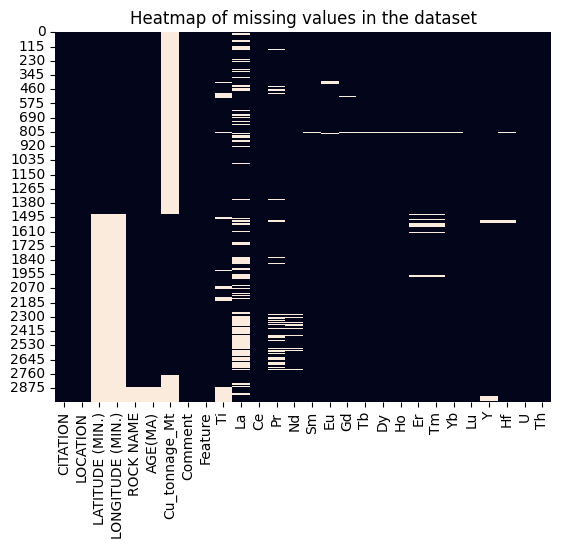

In [18]:
plt.title("Heatmap of missing values in the dataset")
sns.heatmap(df1.isnull(), cbar=False)

### Renaming the columns for ease of working

In [19]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [20]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [21]:
### Checking the latitude column for null values

In [22]:
null_lat_rec = sqldf("""
                        SELECT location, COUNT(*)
                        FROM df1
                        WHERE latitude IS NULL
                        GROUP BY location

                     """)

In [23]:
# pd.DataFrame(df1.loc[df1['latitude'].isnull()].groupby(['location'])['location'].count()).rename(columns = {'location':'count'})

In [24]:
null_lat_rec

,location,COUNT(*)
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


### Data Collection for missing latitude and longitude

In [25]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [26]:
### Functions to fill missing latitude and longitude values

In [27]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [28]:
df1['location'] = df1['location'].apply(str.strip)

In [29]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,NaN,NaN,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,NaN,NaN,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,NaN,NaN,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,NaN,NaN,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,NaN,NaN,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


### Invoking the functions to replace missing latitudes and longitudes

In [30]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [31]:
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,48.0,-76.0,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,48.0,-76.0,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,48.0,-76.0,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,48.0,-76.0,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,48.0,-76.0,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [32]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [33]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Replace "Cu_Tonnage" for Barren ores with 0.0

In [34]:
df1.loc[df1['Comment'] == 'Barren'].shape

(1687, 28)

In [35]:
df1.loc[df1['Comment'] == 'Barren', 'Cu_tonnage_Mt'] = 0.0

### Just the trace elements left for handling nulls

In [36]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
rock_name        124
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
CITATION           0
location           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
latitude           0
Th                 0
dtype: int64

In [37]:
### Missing "rock_name" records belong to BARREN type.

In [38]:
sqldf("""
            
            SELECT Comment, COUNT(*) AS count
            FROM df1
            WHERE rock_name IS NULL
            GROUP BY Comment

      """)

,Comment,count
0,Barren,124


In [39]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0


In [40]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [41]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: rock_name, Length: 115, dtype: int64

In [42]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [43]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

,Comment,rock_name,age_ma,location
2864,Barren,NaN,NaN,NChuquicamata-Rad
2865,Barren,NaN,NaN,Chuquicamata-Rad
2866,Barren,NaN,NaN,Chuquicamata-Rad
2867,Barren,NaN,NaN,Chuquicamata-Rad
2868,Barren,NaN,NaN,Chuquicamata-Rad
...,...,...,...,...
2983,Barren,NaN,NaN,Chuquicamata-Rad
2984,Barren,NaN,NaN,Chuquicamata-Rad
2985,Barren,NaN,NaN,Chuquicamata-Rad
2986,Barren,NaN,NaN,Chuquicamata-Rad


In [44]:
sqldf("""
            SELECT location, age_ma, Comment, rock_name, latitude, longitude
            FROM df1
            WHERE location = 'Chuquicamata'
            
     """)

,location,age_ma,Comment,rock_name,latitude,longitude
0,Chuquicamata,35.0,Fertility,610-01,-22.0,-67.0
1,Chuquicamata,35.0,Fertility,610-02,-22.0,-67.0
2,Chuquicamata,35.0,Fertility,610-03,-22.0,-67.0
3,Chuquicamata,35.0,Fertility,610-04,-22.0,-67.0
4,Chuquicamata,35.0,Fertility,610-05,-22.0,-67.0
5,Chuquicamata,35.0,Fertility,610-06,-22.0,-67.0
6,Chuquicamata,35.0,Fertility,610-07,-22.0,-67.0
7,Chuquicamata,35.0,Fertility,610-08,-22.0,-67.0
8,Chuquicamata,35.0,Fertility,610-09,-22.0,-67.0
9,Chuquicamata,35.0,Fertility,610-10,-22.0,-67.0


In [45]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [46]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [47]:
### Age_ma missing values

In [48]:
null_age = sqldf("""
                      SELECT location, Comment  
                      FROM df1
                      WHERE age_ma IS NULL
                  """)

In [49]:
null_age['Comment'].value_counts()

Barren    124
Name: Comment, dtype: int64

In [50]:
null_age

,location,Comment
0,Chuquicamata-Rad,Barren
1,Chuquicamata-Rad,Barren
2,Chuquicamata-Rad,Barren
3,Chuquicamata-Rad,Barren
4,Chuquicamata-Rad,Barren
...,...,...
119,Chuquicamata-Rad,Barren
120,Chuquicamata-Rad,Barren
121,Chuquicamata-Rad,Barren
122,Chuquicamata-Rad,Barren


In [51]:
null_age['location'].value_counts()

Chuquicamata-Rad    124
Name: location, dtype: int64

In [52]:
df1['age_ma'].sample(20)

1966     240.00000
220      235.00000
1226     127.00000
2712     370.00000
1716     170.00000
496       59.90000
352      398.52827
127      119.00000
1810       3.70000
1288     124.00000
427       18.30000
2752     203.00000
458       12.00000
73       107.00000
1191    2563.00000
1339     120.00000
115      112.00000
270      235.00000
2476     370.00000
128      113.00000
Name: age_ma, dtype: float64

In [53]:
barren_age = sqldf("""
                  SELECT age_ma, LOCATION  
                  FROM df1
                  WHERE Comment = 'Barren'

                  """)

In [54]:
barren_age

,age_ma,location
0,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
1,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
2,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
3,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
4,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
...,...,...
1682,NaN,Chuquicamata-Rad
1683,NaN,Chuquicamata-Rad
1684,NaN,Chuquicamata-Rad
1685,NaN,Chuquicamata-Rad


In [55]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [56]:
df1.drop(columns=['CITATION', 'rock_name'], inplace=True)

In [57]:
df1.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [58]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
location           0
latitude           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
Th                 0
dtype: int64

In [59]:
def replace_nulls(df, features):
    for feature in features:
        
        feature_median = df1[feature].median()
        
        print(feature, feature_median)
        
        df[feature] = df[feature].fillna(feature_median)
        
    return df

In [60]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [61]:
# Copy of the dataframe
df1_copy = df1.copy()

In [62]:
df1_copy = replace_nulls(df1_copy, features)

Ti 7.22
La 0.09
Ce 14.8
Pr 0.10560457100000001
Nd 1.47
Sm 2.979013672
Eu 0.6647571
Gd 16.88696182
Tb 5.99
Dy 67.35714722
Ho 28.63898955
Er 133.0
Tm 31.855585745
Yb 326.2416992
Lu 65.088261415
Y 830.1593614000001
Hf 9563.0
U 234.0
Th 118.60787765


In [63]:
df1_copy.isnull().sum()

location           0
latitude           0
longitude          0
age_ma           124
Cu_tonnage_Mt      0
Comment            0
Feature            0
Ti                 0
La                 0
Ce                 0
Pr                 0
Nd                 0
Sm                 0
Eu                 0
Gd                 0
Tb                 0
Dy                 0
Ho                 0
Er                 0
Tm                 0
Yb                 0
Lu                 0
Y                  0
Hf                 0
U                  0
Th                 0
dtype: int64

In [64]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

,location,latitude,longitude,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,La,Ce,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2864,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.068,15.0,...,153.4,53.7,228.6,46.0,408.0,70.1,1609.0,8515.0,453.0,494.0
2865,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.074,15.0,...,164.7,57.2,247.0,50.1,445.0,76.5,1735.0,8836.0,445.0,493.0
2866,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.036,21.0,...,153.4,52.1,222.6,46.2,412.0,69.7,1563.0,10070.0,544.0,533.0
2867,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.062,20.0,...,153.9,51.9,222.0,45.8,412.0,69.1,1545.0,9855.0,506.0,498.0
2868,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.003,15.0,...,92.0,32.7,142.6,30.9,286.0,49.5,988.0,10232.0,312.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.007,8.0,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.013,9.0,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.015,9.0,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,7.22,0.002,8.0,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [65]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad', 'age_ma'] = 35.0

In [66]:
df1_copy.isna().sum()

location         0
latitude         0
longitude        0
age_ma           0
Cu_tonnage_Mt    0
Comment          0
Feature          0
Ti               0
La               0
Ce               0
Pr               0
Nd               0
Sm               0
Eu               0
Gd               0
Tb               0
Dy               0
Ho               0
Er               0
Tm               0
Yb               0
Lu               0
Y                0
Hf               0
U                0
Th               0
dtype: int64

In [67]:
df1_copy['Feature'].value_counts()

0    1687
1    1301
Name: Feature, dtype: int64

### Handling Outliers

In [68]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [69]:
features_with_outliers = ['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
                           'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

### Box-plot before handling outliers

age_ma float64


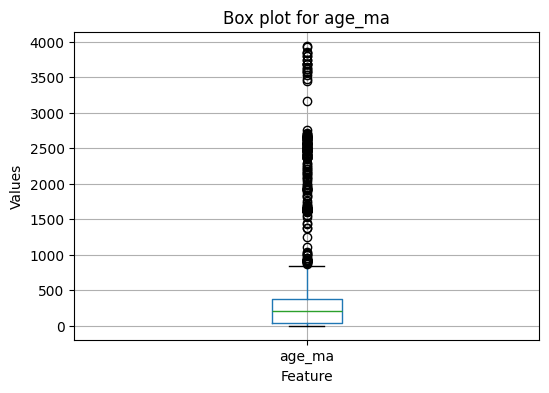

Ti float64


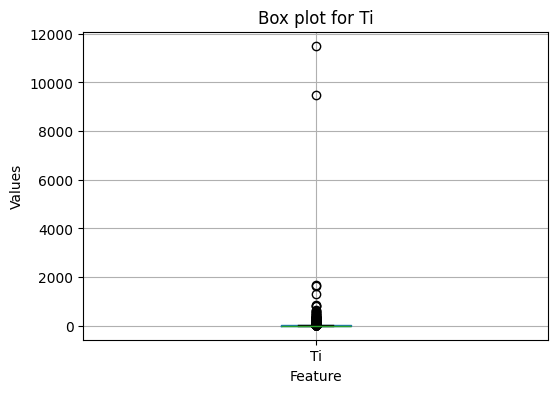

La float64


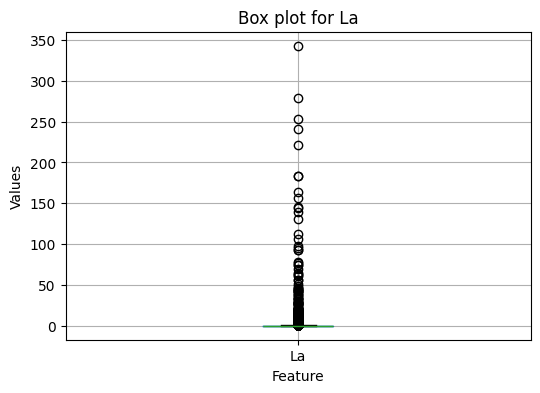

Ce float64


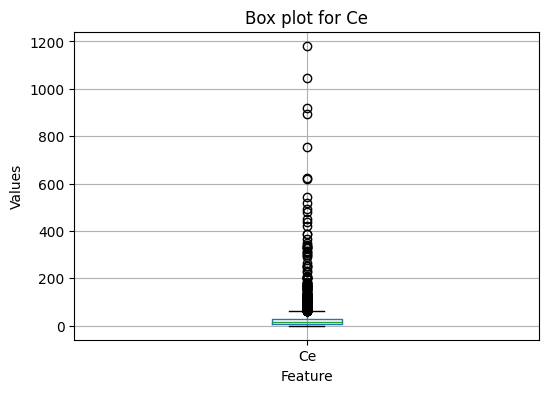

Pr float64


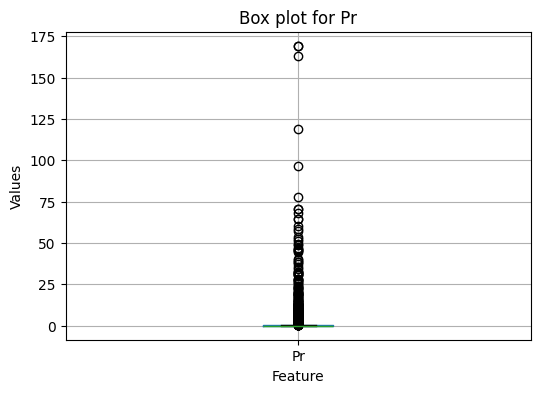

Nd float64


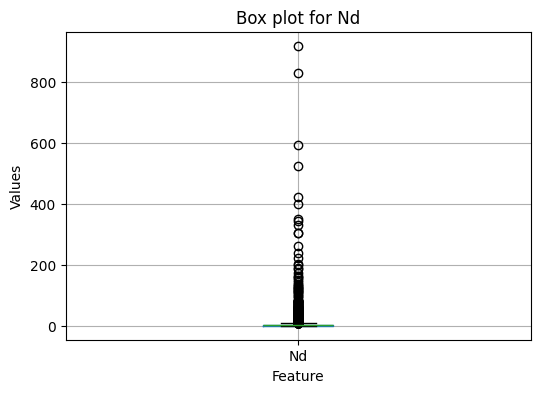

Sm float64


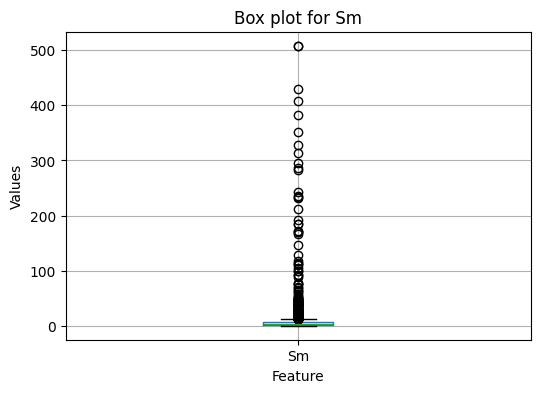

Eu float64


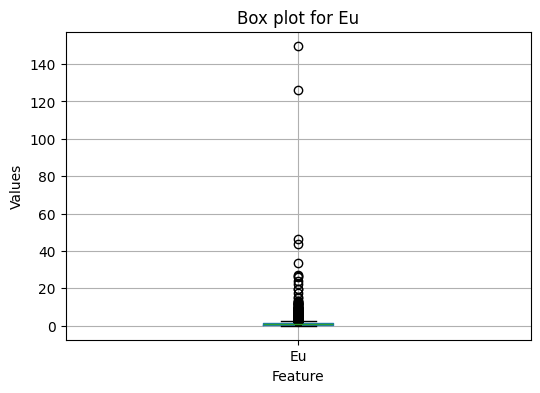

Gd float64


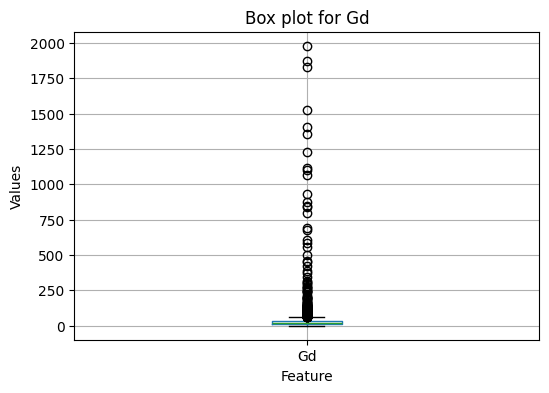

Tb float64


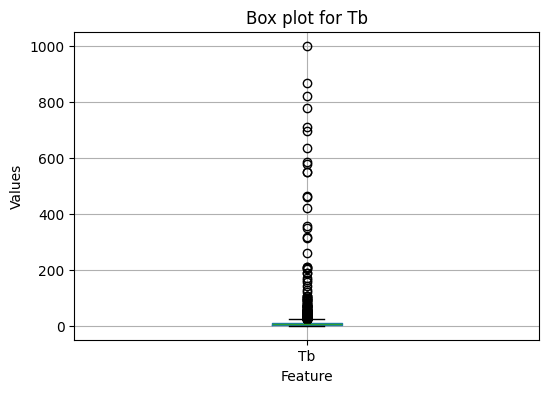

Dy float64


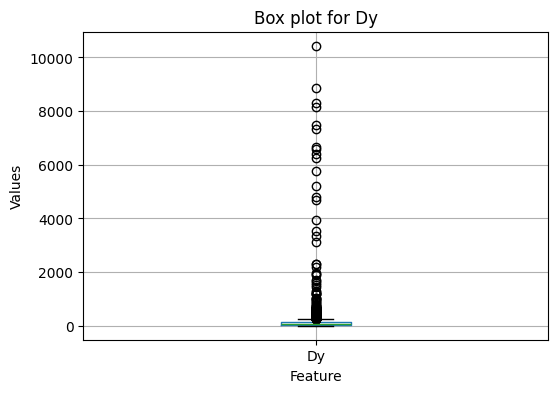

Ho float64


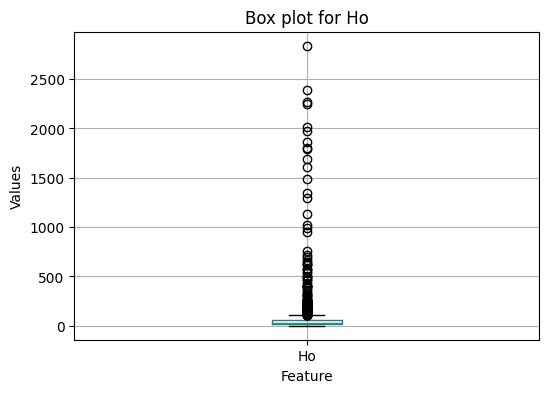

Er float64


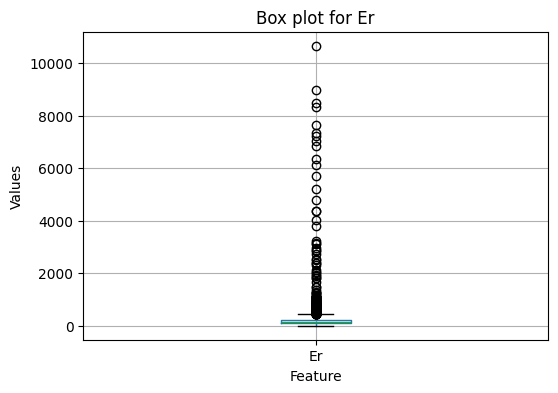

Tm float64


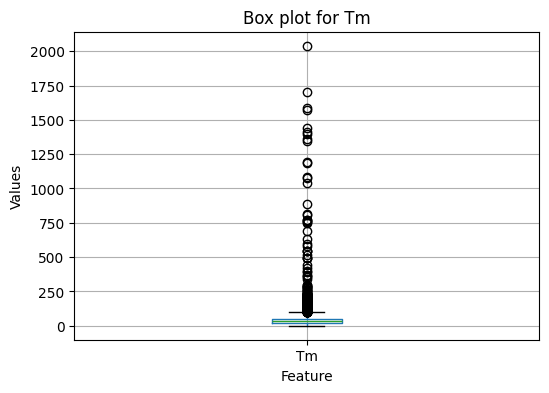

Yb float64


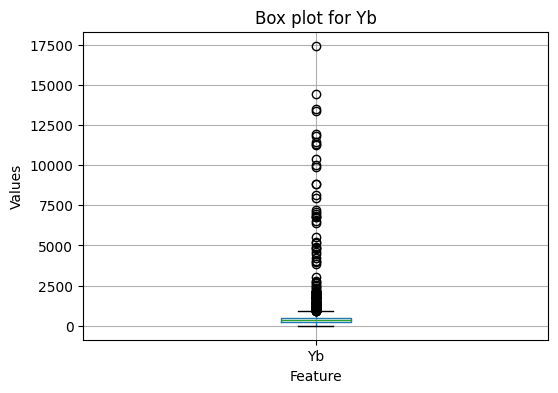

Lu float64


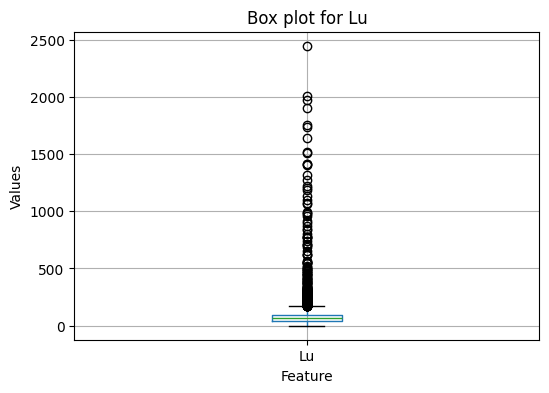

Y float64


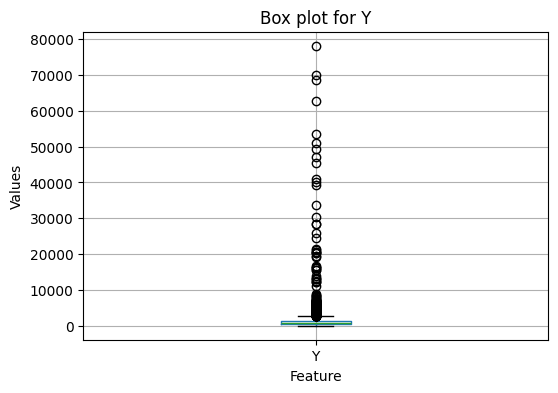

Hf float64


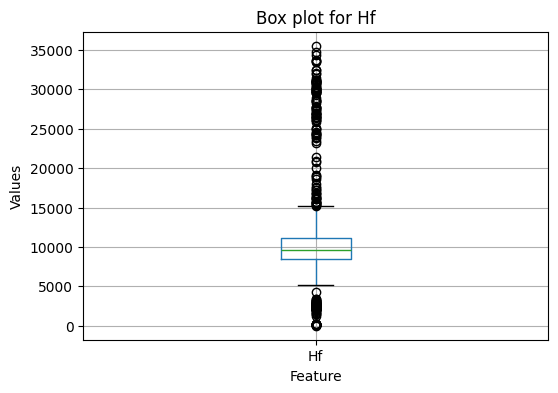

U float64


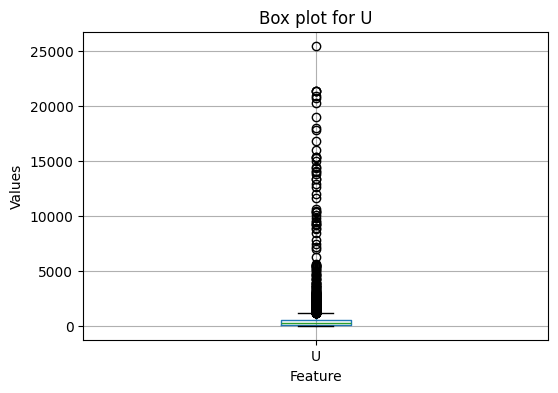

Th float64


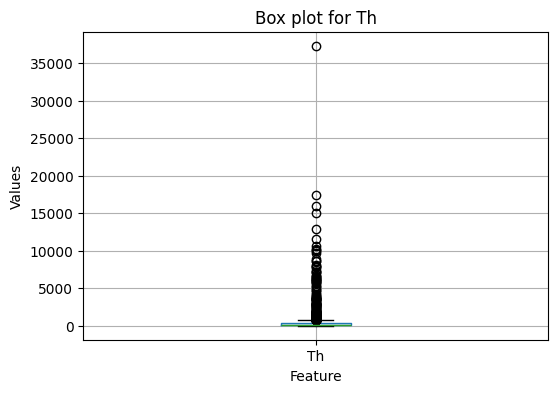

In [70]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [71]:
import pandas as pd

def replace_outliers(df):
    # Loop through each column
    for feature in features_with_outliers:
        # Check if the column contains numeric data (integer or float)
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate the first and third quartiles
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            
            # Calculate the interquartile range (IQR)
            iqr = q3 - q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Replace outliers with the maximum and minimum values of the column
            df[feature] = df[feature].apply(lambda x: max(x, lower_bound) if x < lower_bound 
                                            else min(x, upper_bound) if x > upper_bound 
                                            else x)
    
    return df

In [72]:
df1_copy = replace_outliers(df1_copy)

### Box-plots after handling outliers

age_ma float64


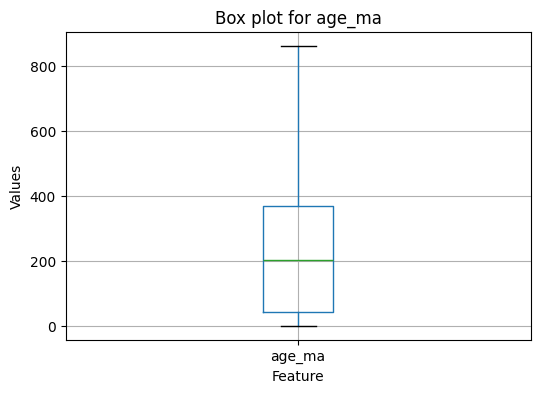

Ti float64


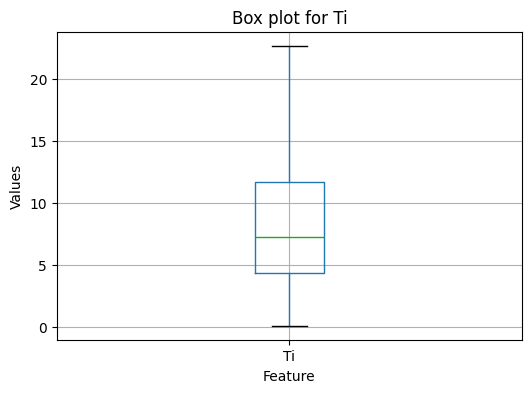

La float64


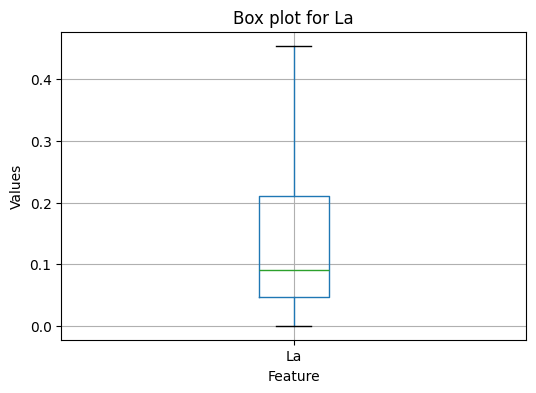

Ce float64


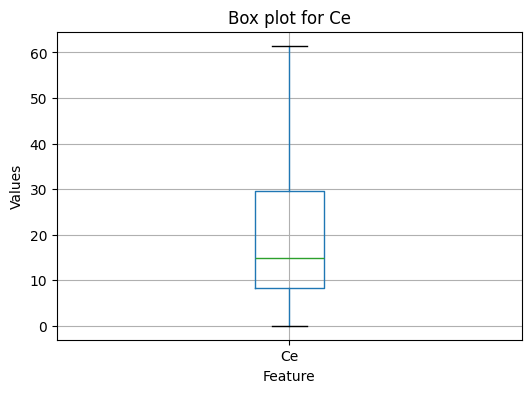

Pr float64


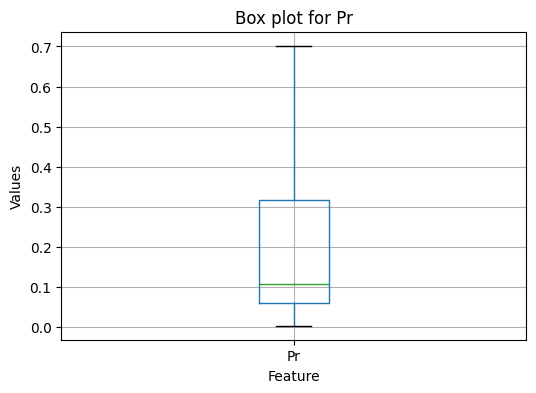

Nd float64


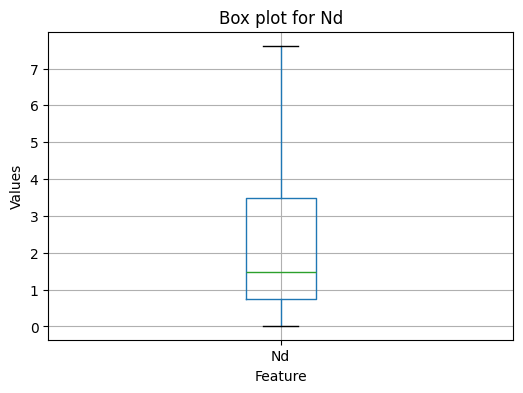

Sm float64


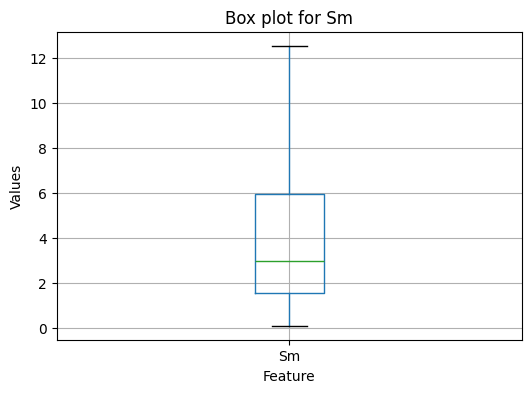

Eu float64


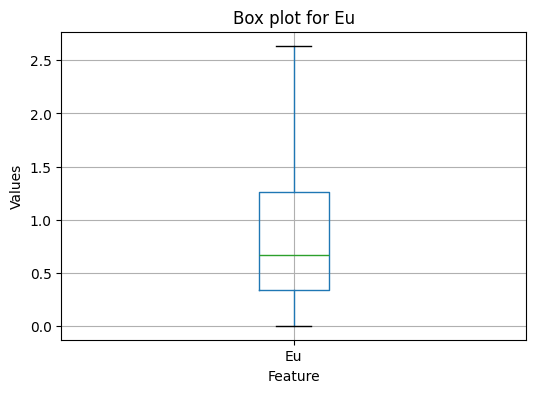

Gd float64


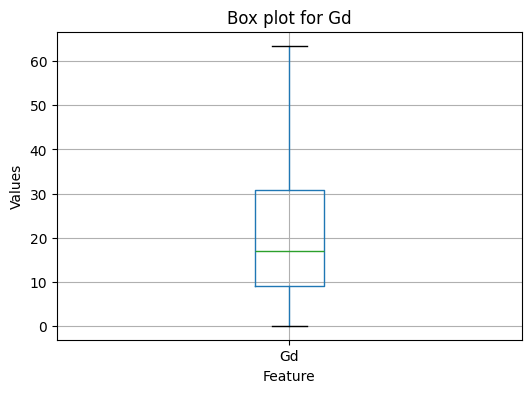

Tb float64


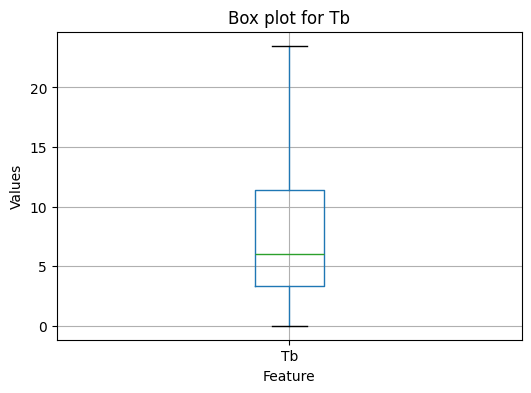

Dy float64


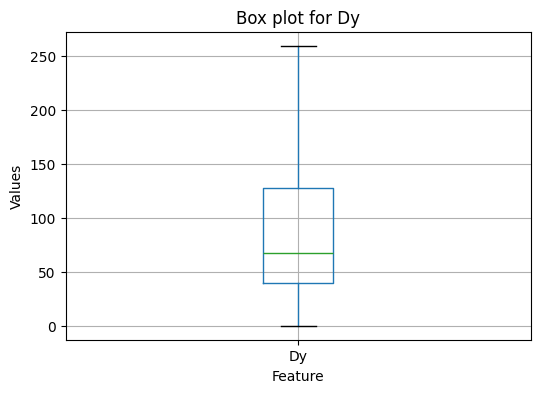

Ho float64


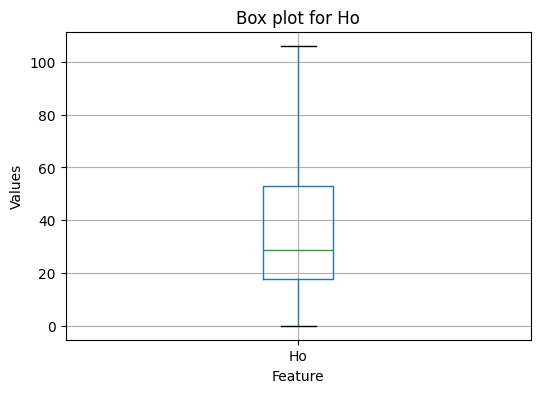

Er float64


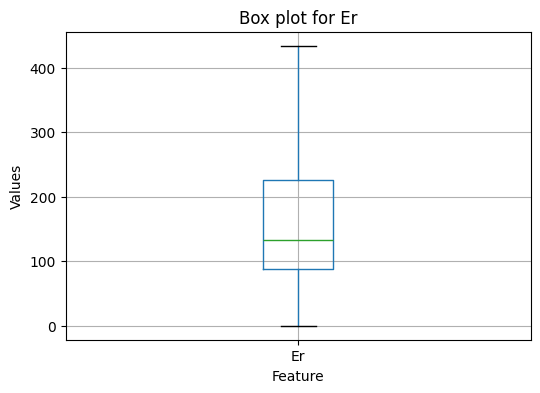

Tm float64


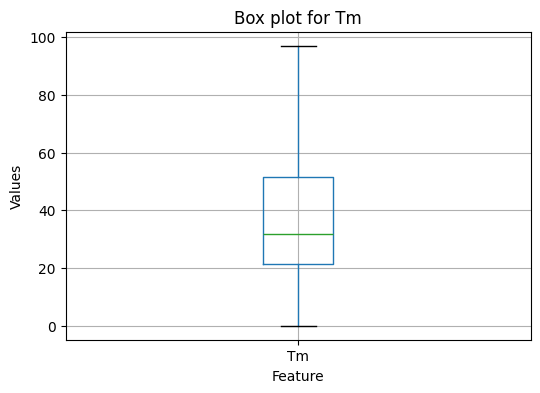

Yb float64


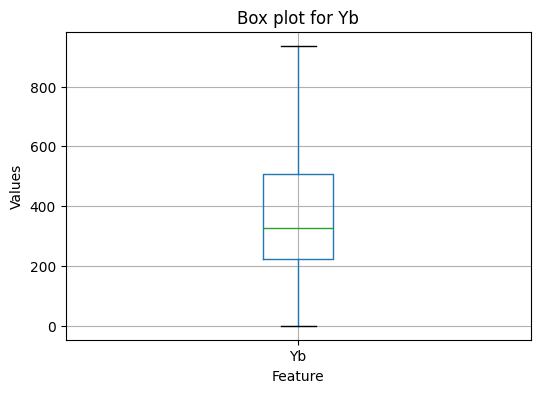

Lu float64


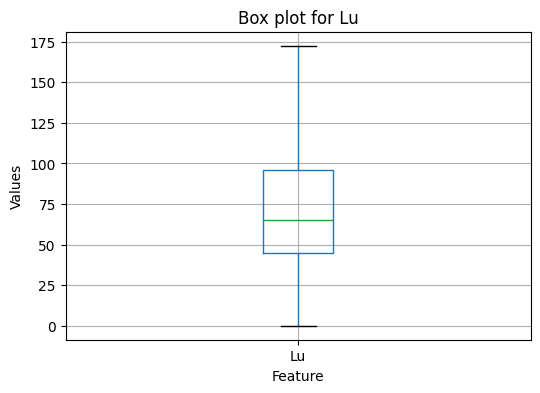

Y float64


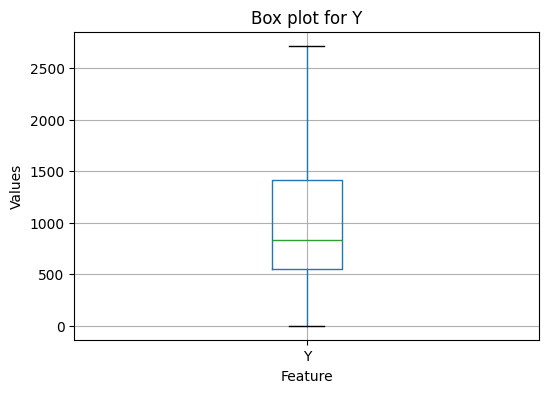

Hf float64


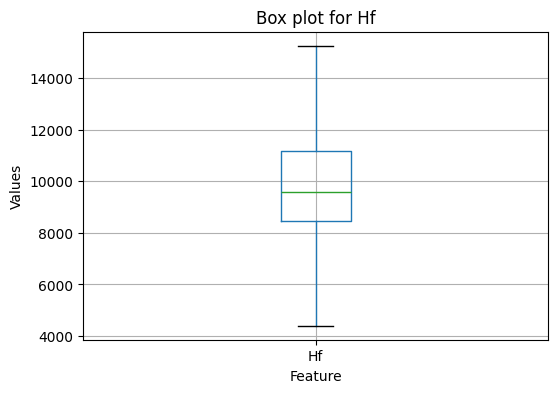

U float64


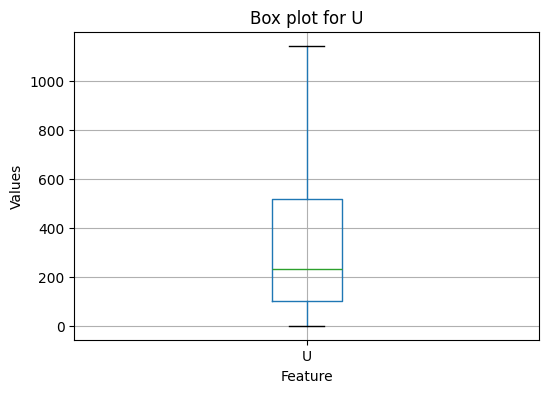

Th float64


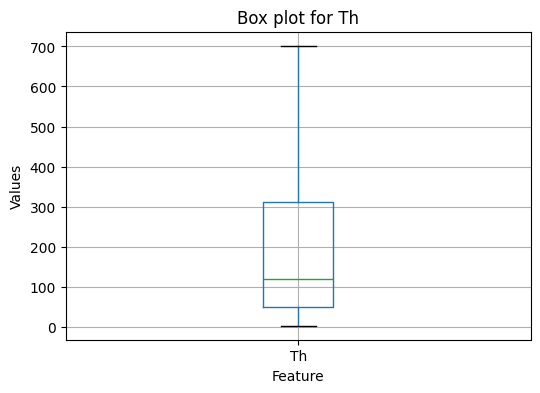

In [73]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

### Creating a new cluster ID column replacing latitude and longitude

In [74]:
# df1_copy.columns

In [75]:
# from sklearn.cluster import KMeans ,AgglomerativeClustering

# # creates 5 clusters using hierarchical clustering.
# agc = AgglomerativeClustering(n_clusters =5, 
#                               affinity='euclidean', 
#                               linkage='ward'
#                              )

# df1_copy['Agg Cluster ID'] = agc.fit_predict(df1_copy[['latitude','longitude']])

In [76]:
# df1_copy['Agg Cluster ID'].value_counts()

In [77]:
# # creates 5 clusters using k-means clustering algorithm.
# kmeans = KMeans(5)
# # clusters = kmeans.fit_predict(df1_copy[['latitude','longitude']])
# df1_copy['kmeans Cluster ID'] = kmeans.fit_predict(df1_copy[['latitude','longitude']])

In [78]:
# df1_copy['kmeans Cluster ID'].value_counts()

### For time being let us consider Agg Cluster ID in our analysis. Replacing latitude and longitude

In [79]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

### Scatter plot of clustered data points

In [80]:
# plt.title("Scatter Plot of clustered data points")
# plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["Agg Cluster ID"], )
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

In [81]:
# plt.title("Scatter Plot of clustered data points")
# plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["kmeans Cluster ID"])
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

### Feature Correlation

In [82]:
# df1_copy[['Ti', 'La', 'Ce', 'Pr']]

In [83]:
df1_copy.corr()

,latitude,longitude,age_ma,Cu_tonnage_Mt,Feature,Ti,La,Ce,Pr,Nd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
latitude,1.000000,0.341900,0.541450,-0.080129,-0.084176,0.220605,0.208649,0.009636,0.143455,0.131901,...,0.108066,0.049604,0.102585,0.106320,0.127016,0.114703,0.030294,0.132785,0.019443,-0.034745
longitude,0.341900,1.000000,0.129995,-0.018957,-0.017407,0.103153,0.079127,0.017410,0.029269,0.018925,...,0.130060,0.092867,0.125551,0.133225,0.146957,0.112550,0.125629,0.139823,0.013870,0.009997
age_ma,0.541450,0.129995,1.000000,0.007907,-0.189150,0.295922,0.144834,-0.112989,0.130484,0.132503,...,-0.015452,-0.069138,-0.044640,-0.089069,-0.062256,-0.162639,-0.121103,0.103737,-0.172432,-0.250605
Cu_tonnage_Mt,-0.080129,-0.018957,0.007907,1.000000,0.663387,-0.153252,-0.273896,-0.181123,-0.300347,-0.330248,...,-0.340653,-0.244858,-0.266570,-0.235098,-0.175828,-0.179105,-0.278536,-0.379409,-0.307711,-0.283846
Feature,-0.084176,-0.017407,-0.189150,0.663387,1.000000,-0.334678,-0.379508,-0.099995,-0.443655,-0.462226,...,-0.466397,-0.361153,-0.367534,-0.347631,-0.278780,-0.222192,-0.388005,-0.369591,-0.214350,-0.191801
Ti,0.220605,0.103153,0.295922,-0.153252,-0.334678,1.000000,0.225459,0.081738,0.317068,0.380869,...,0.250888,0.225800,0.202677,0.152066,0.127360,0.034899,0.207948,0.132514,-0.125904,0.016615
La,0.208649,0.079127,0.144834,-0.273896,-0.379508,0.225459,1.000000,0.442516,0.795966,0.636202,...,0.287794,0.273684,0.258769,0.310586,0.241465,0.279217,0.244905,0.128141,0.247353,0.271912
Ce,0.009636,0.017410,-0.112989,-0.181123,-0.099995,0.081738,0.442516,1.000000,0.530666,0.576406,...,0.398415,0.371555,0.417026,0.372331,0.408619,0.390776,0.445314,0.192486,0.477930,0.726890
Pr,0.143455,0.029269,0.130484,-0.300347,-0.443655,0.317068,0.795966,0.530666,1.000000,0.899975,...,0.462254,0.442418,0.397161,0.424909,0.319970,0.353335,0.393766,0.089392,0.265643,0.385707
Nd,0.131901,0.018925,0.132503,-0.330248,-0.462226,0.380869,0.636202,0.576406,0.899975,1.000000,...,0.613139,0.484602,0.521764,0.445446,0.427456,0.348232,0.529223,0.164697,0.280469,0.469371


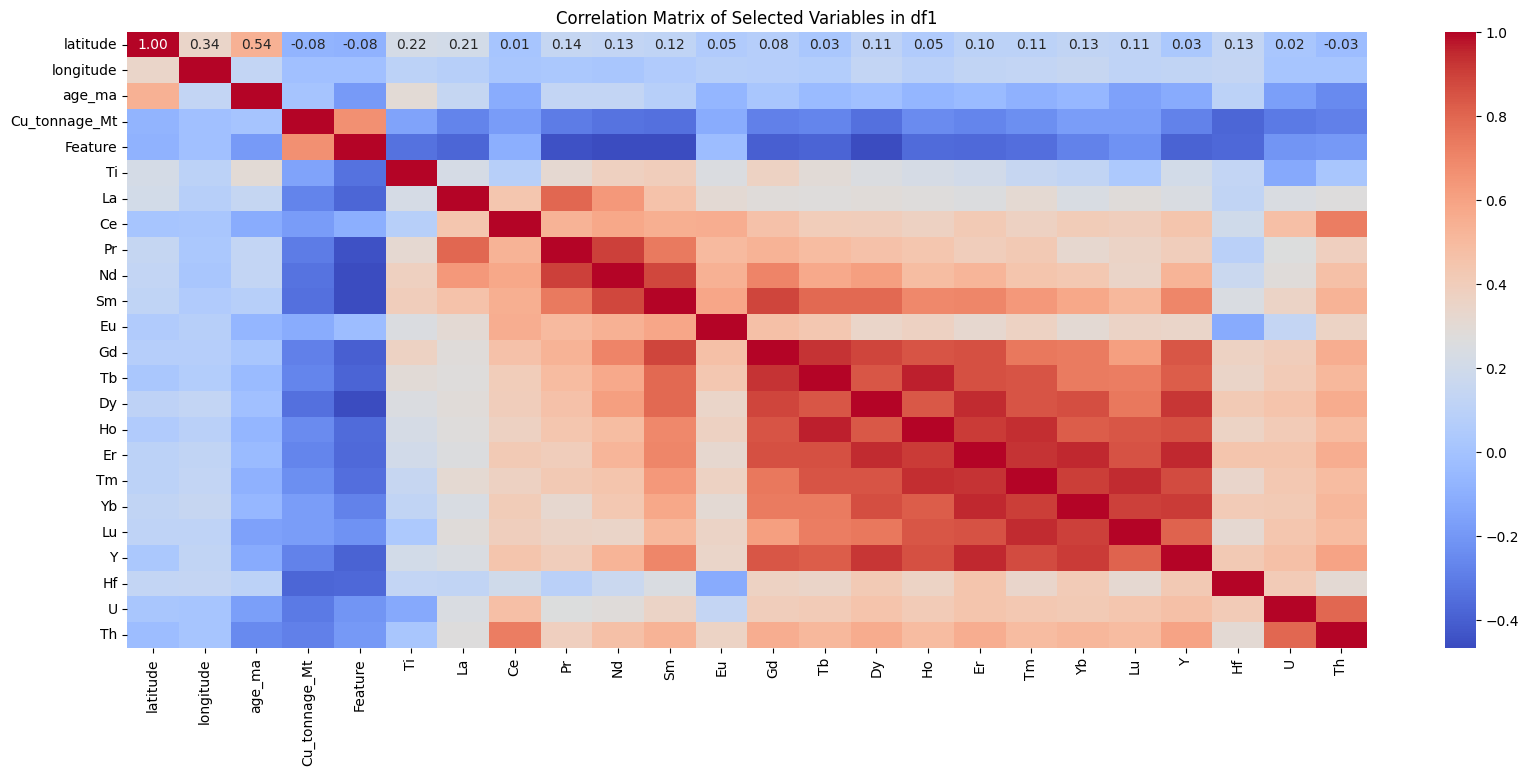

In [84]:
plt.figure(figsize=(20, 8))
corr = df1_copy.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables in df1')
plt.show()

### Sample ML Model testing

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [86]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [87]:
X = df1_copy.drop(columns = ['location', 'Comment', 'Feature', 'latitude', 'longitude', 'Cu_tonnage_Mt'])
y = df1_copy['Feature']

In [88]:
X.columns

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [89]:
X.head()

,age_ma,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,7.88,0.0500,10.500000,0.050000,4.250000,11.600000,1.990000,61.600000,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12390.0,305.0,134.0
1,222.0,10.90,0.4545,61.474347,0.701901,7.618805,12.540955,2.637494,63.498619,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12591.0,503.0,272.0
2,222.0,6.00,0.0200,25.100000,0.300000,4.410000,12.540955,2.300000,63.498619,23.495933,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12724.0,639.0,414.0
3,222.0,9.06,0.2800,12.000000,0.105605,1.880000,5.080000,1.010000,33.800000,15.500000,194.000000,83.0000,356.00000,89.500000,762.000000,144.000000,1832.000000,12894.0,308.0,127.0
4,222.0,4.93,0.0700,16.500000,0.150000,2.320000,8.230000,1.520000,45.600000,19.700000,257.000000,106.1375,434.18329,97.083086,936.000000,171.000000,2355.000000,12535.0,348.0,155.0


In [90]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [92]:
type(X_train)

pandas.core.frame.DataFrame

In [93]:
y_train.shape

(2390,)

In [94]:
y_train.sum()

1045

### Perform scaling

In [95]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

In [96]:
lr_model = LogisticRegression()

In [97]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [98]:
y_pred = lr_model.predict(X_test_scaled)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [100]:
accuracy_score(y_test, y_pred)

0.8578595317725752

In [101]:
cm = confusion_matrix(y_test, y_pred)

In [102]:
cm

array([[284,  58],
       [ 27, 229]])

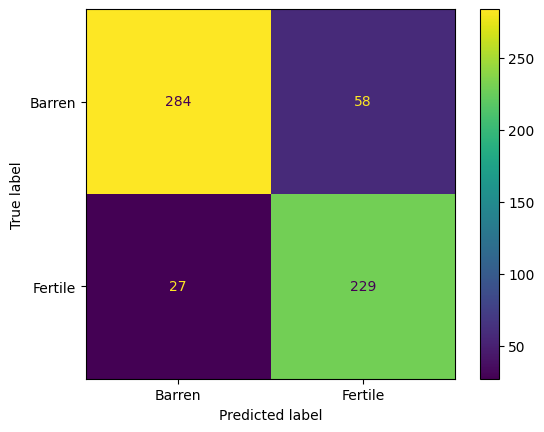

In [103]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

In [104]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9132    0.8304    0.8698       342
   Fertility     0.7979    0.8945    0.8435       256

    accuracy                         0.8579       598
   macro avg     0.8555    0.8625    0.8566       598
weighted avg     0.8638    0.8579    0.8585       598



## Null Handling - K Nearest Neighbors Imputation

In [105]:
df_new = df1.copy()

In [106]:
df_new.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [107]:
df_new.drop(columns=['location', 'latitude', 'longitude', 'Cu_tonnage_Mt', 'Comment'], inplace=True)

In [108]:
df_new.isnull().sum()

age_ma     124
Feature      0
Ti         255
La         923
Ce           5
Pr         256
Nd          93
Sm           8
Eu          15
Gd           6
Tb           1
Dy           3
Ho           1
Er          79
Tm          78
Yb           1
Lu           2
Y           74
Hf          25
U            0
Th           0
dtype: int64

In [109]:
features = df_new.columns

In [110]:
features.drop(labels=['Feature'])

Index(['age_ma', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [111]:
from sklearn.impute import KNNImputer

In [112]:
knn_imputer = KNNImputer(missing_values=np.nan, 
                         n_neighbors = 5,
                         weights='distance',
                         copy=False)

In [113]:
df_new = pd.DataFrame(knn_imputer.fit_transform(df_new[features]))
df_new.columns = features

In [114]:
df_new.head()

,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.05,10.5,0.050000,4.25,11.60,1.99,61.6,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,0.0,10.90,69.10,169.0,22.500000,132.00,41.80,4.34,102.0,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.02,25.1,0.300000,4.41,13.80,2.30,79.9,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.28,12.0,0.071481,1.88,5.08,1.01,33.8,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.07,16.5,0.150000,2.32,8.23,1.52,45.6,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [115]:
df_new = np.round(df_new, 2)

In [116]:
df_new.head()

,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.05,10.5,0.05,4.25,11.60,1.99,61.6,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,0.0,10.90,69.10,169.0,22.50,132.00,41.80,4.34,102.0,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.02,25.1,0.30,4.41,13.80,2.30,79.9,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.28,12.0,0.07,1.88,5.08,1.01,33.8,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.07,16.5,0.15,2.32,8.23,1.52,45.6,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [117]:
df_new = replace_outliers(df_new)

age_ma float64


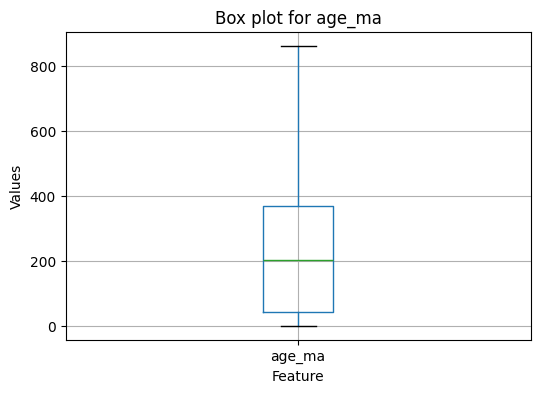

Feature int64


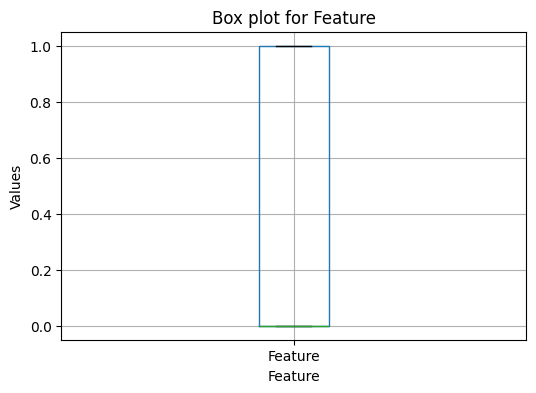

Ti float64


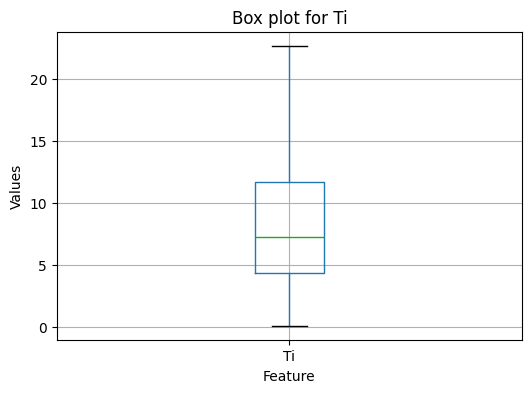

La float64


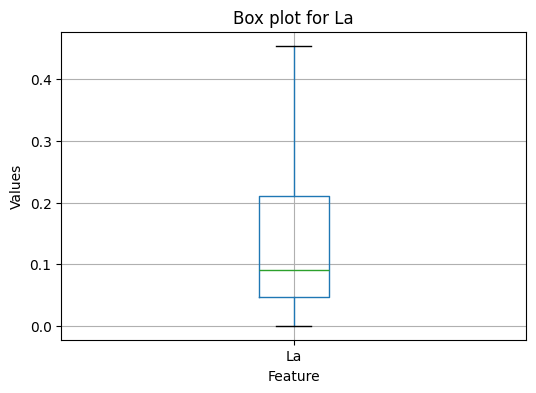

Ce float64


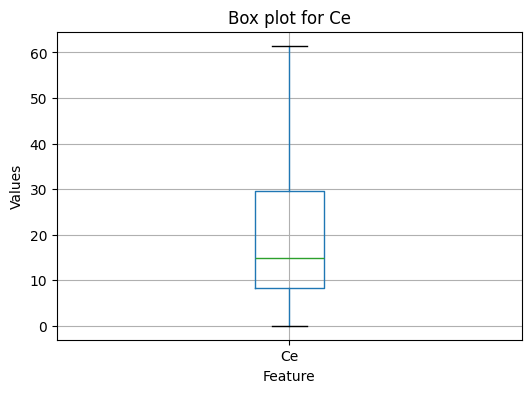

Pr float64


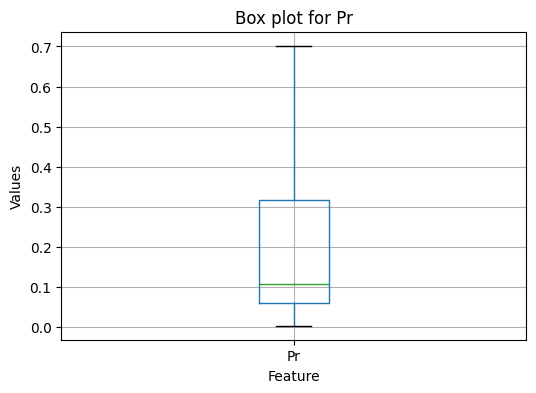

Nd float64


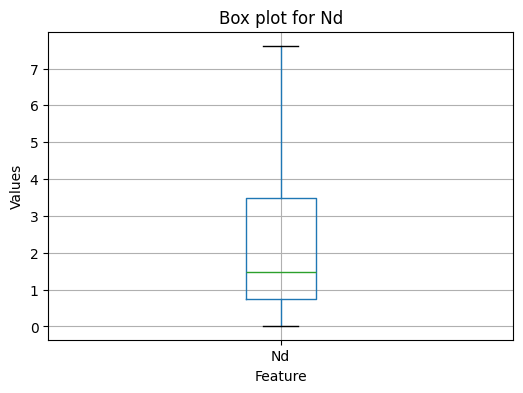

Sm float64


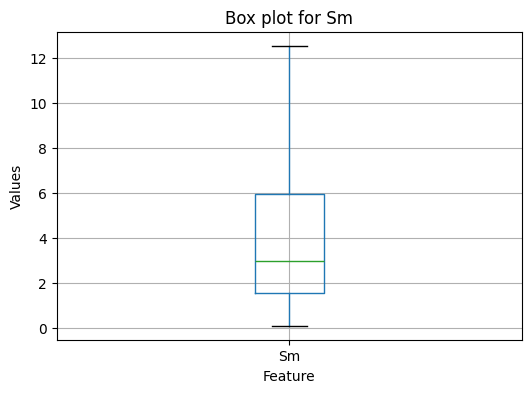

Eu float64


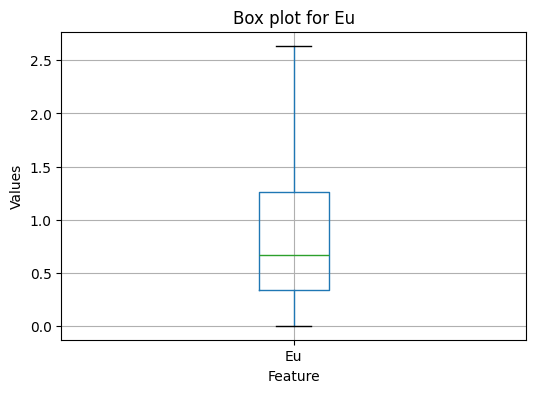

Gd float64


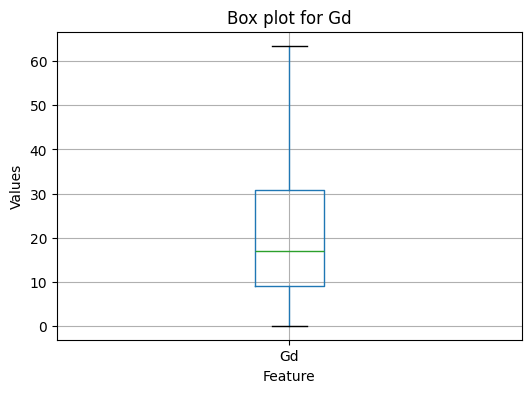

Tb float64


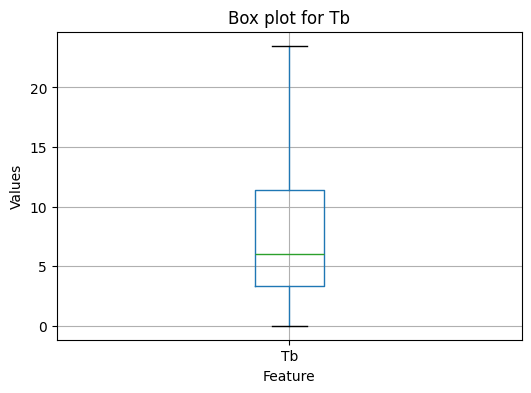

Dy float64


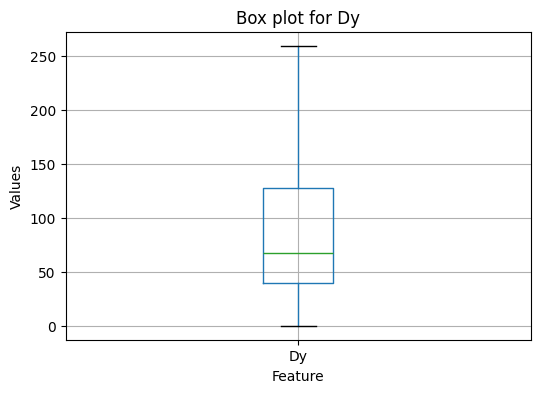

Ho float64


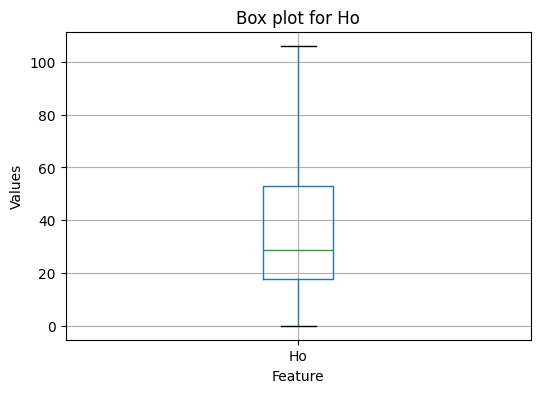

Er float64


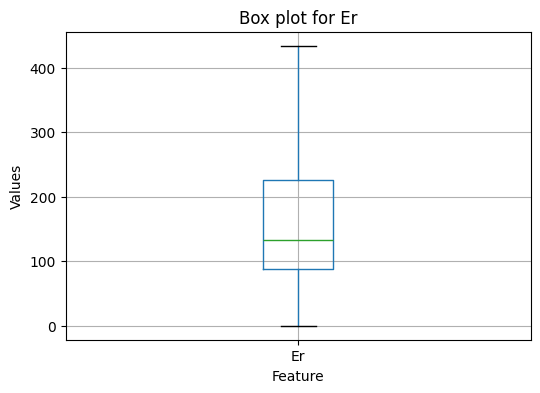

Tm float64


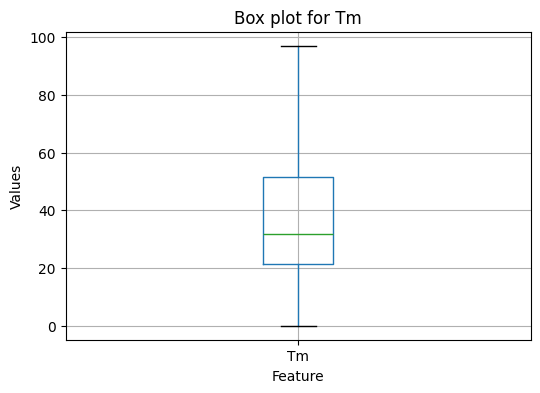

Yb float64


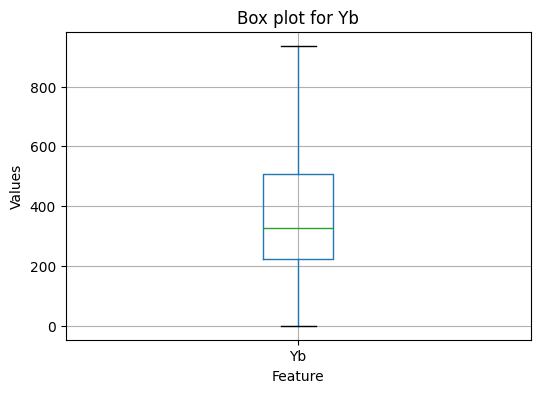

Lu float64


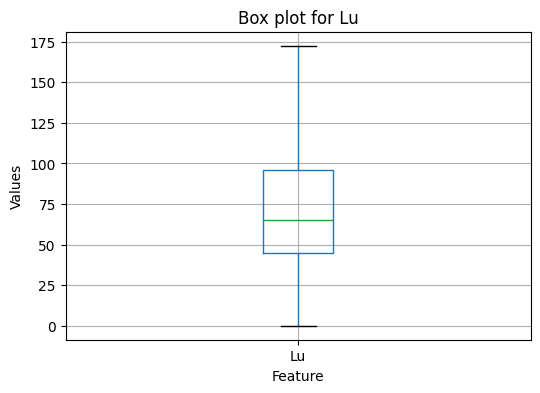

Y float64


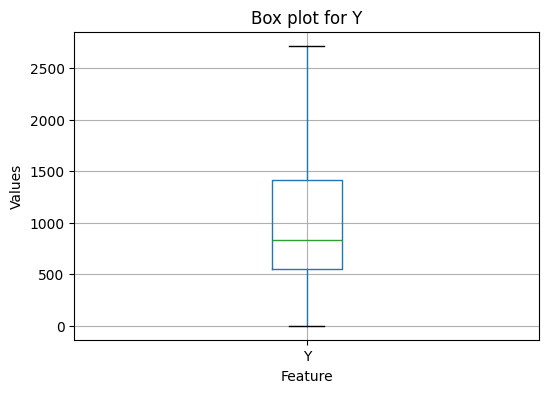

Hf float64


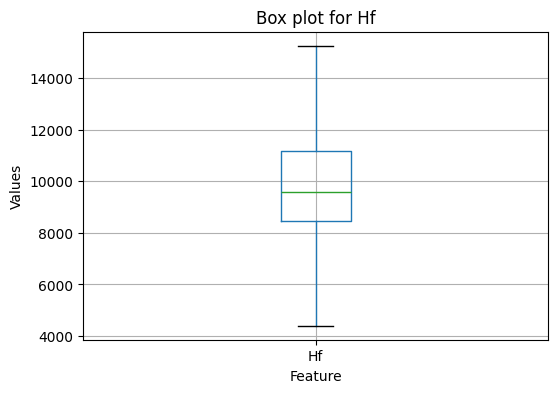

U float64


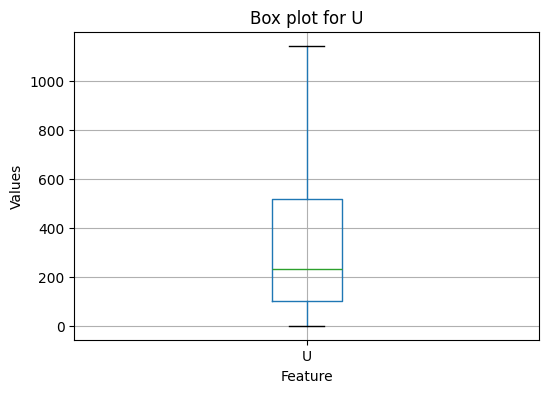

Th float64


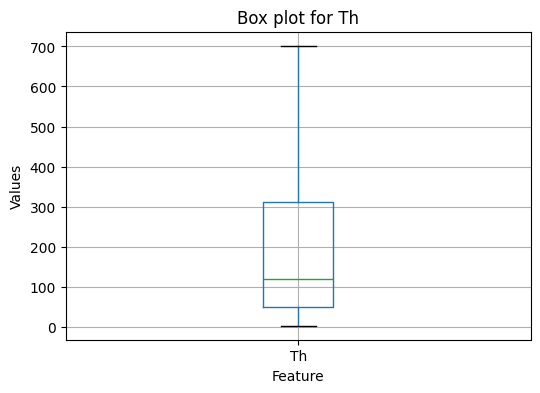

In [118]:
for feature in df_new.columns:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [119]:
X = df_new.drop(columns=['Feature'], axis=1)
y = df_new['Feature']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [121]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
lr_2 = LogisticRegression()

lr_2.fit(X_train_scaled, y_train)

LogisticRegression()

In [123]:
y_pred = lr_2.predict(X_test_scaled)

In [124]:
y_pred

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1.

In [125]:
accuracy_score(y_test, y_pred)

0.8662207357859532

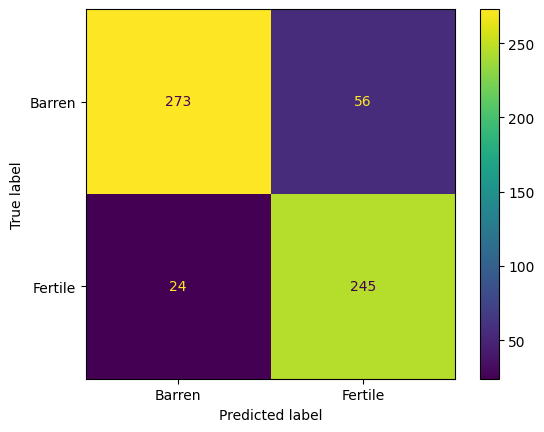

In [126]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

### Hyper-Parameter Tuning: Grid Search CV

In [127]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [137]:
# Hyper-parameters for Logistic Regression

param_grid = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'dual': [True, False],
                'C': [0, 0.5, 1],
                'fit_intercept': [True, False],
                'class_weight': ['balanced'],
                'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
                'max_iter': [100, 500, 1000],
                'n_jobs': [-1]
    
             }

In [138]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
clf = GridSearchCV(
                   lr_2, 
                   param_grid=param_grid,
                   scoring = 'precision',
                   cv = 5 ,
                   verbose = 3
                  )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END

[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0, class_weight=balanced,

[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.522 total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_interc

[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.512 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.554 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.559 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.701 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.769 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.732 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=b

[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.567 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.703 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.760 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=b

[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.738 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.472 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.455 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.506 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, class_weight=b

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.851 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.767 total time=   0.2s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.800 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.837 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, class_weight=b

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.739 total time=   0.9s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.740 total time=   0.4s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.5s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.4s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.851 total time=   0.4s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.848 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.828 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.5s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.839 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.4s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.4s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.737 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, d

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.776 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.807 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.828 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.790 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.841 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=0.5, class_

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.826 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.831 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.790 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.862 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] E

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages

[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.857 total

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.862 total time=   0.0s
[CV 2/5] END C=0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.735 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.736 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.821

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.818 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.844 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 1/5] END C=0.5, 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.845 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.779 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.1s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.835 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.777 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s
[CV 5/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0s
[CV 4/5] END C=0.5, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.857

/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.451 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.445 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True

[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.816 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.786 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.630 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercep

[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.449 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.535 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.459 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.909 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=

[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.430 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.675 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.571 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.594 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=

[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.486 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.553 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.475 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=liblinear;, score=0.719 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.828 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.851 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.800 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=liblinear;, score=0.839 total time=   0.2s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.782 total time=   0.0s
[CV 4/5] END C=1, clas

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.839 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=bal

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.776 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.807 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.828 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.790 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.828 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, clas

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.826 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.831 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.828 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.860 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.790 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.816 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.828 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.790 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.816 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.848 total time=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.819 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.862 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.726 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.848 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.819 total time=   0.0s
[CV 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.857 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.743 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.739 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.819 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=l2, solver=newton-cholesky;, score=0.862 total time=   0.0s
[CV 2/5] END C=1, class_weig

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.735 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.736 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.857 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=500, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.821 total time=

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.726 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.844 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.835 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.726 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.848 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=l2, solver=newton-cg;, score=0.819 total time=   0.1s
[CV 1/5] END C=1, class_weight=b

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.845 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.779 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.835 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=lbfgs;, score=0.777 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.872 total time=   0.1s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.835 total time=   0.1s


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.706 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.857 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.872 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.835 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=1000, n_jobs=-1, penalty=none, solver=newton-cholesky;, score=0.706 total time=   0.0

/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.5, 1], 'class_weight': ['balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky']},
             scoring='precision', verbose=3)

In [142]:
clf.best_params_

{'C': 0.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [143]:
clf.best_score_

0.8389097714458996

In [145]:
best_model_lr = LogisticRegression(C= 0.5,
                                 class_weight = 'balanced',
                                 dual= False,
                                 fit_intercept= True,
                                 max_iter= 100,
                                 n_jobs= -1,
                                 penalty= 'l2',
                                 solver= 'liblinear')

In [146]:
best_model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1,
                   solver='liblinear')

In [149]:
y_pred_best = best_model_lr.predict(X_valid)

In [150]:
accuracy_score(y_valid, y_pred_best)

0.8988095238095238

### Random Forest

In [186]:
from sklearn import ensemble

In [187]:
rf = ensemble.RandomForestClassifier()

In [189]:
rf.fit(X_train.values, y_train.values)

RandomForestClassifier()

In [190]:
preds_rf = rf.predict(X_valid)

In [191]:
accuracy_score(y_valid, preds_rf)

0.9315476190476191

### Hyper-Parameter Tuning: Bayesian Optimization

In [156]:
# !pip install scikit-optimize

In [160]:
from functools import partial
from skopt import gp_minimize
from skopt import space
from sklearn import model_selection

In [192]:
def optimize(params, param_names, x, y):
    params = dict(zip(param_names, params))
#     model = LogisticRegression(**params)
    model = ensemble.RandomForestClassifier(**params)
    kfold = model_selection.StratifiedKFold(n_splits=5)
    accuracies = []
    
    for idx in kfold.split(X=x, y=y):
        train_idx, valid_idx = idx[0], idx[1]        
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        
        xvalid = x[valid_idx]
        yvalid = y[valid_idx]
        
        model.fit(xtrain, ytrain)        
        preds = model.predict(xvalid)        
        fold_accuracy = accuracy_score(yvalid, preds)
        
        accuracies.append(fold_accuracy)
        
    return -1.0 * np.mean(accuracies)

In [ ]:
# param_grid = {
#                 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#                 'dual': [True, False],
#                 'C': [0, 0.5, 1],
#                 'fit_intercept': [True, False],
#                 'class_weight': ['balanced'],
#                 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
#                 'max_iter': [100, 500, 1000],
#                 'n_jobs': [-1]
    
#              }

In [181]:
# param_space = [
    
#     space.Categorical(categories=['l1', 'none'], name='penalty'),
#     space.Categorical(categories=[True, False], name='dual'),
#     space.Real(0, 1, prior='uniform', name='C'),
#     space.Categorical(categories=[True, False], name='fit_intercept'),
# #     space.Categorical(categories=['balanced', 'none'], name='class_weight'),
#     space.Categorical(['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'], name='solver'),
#     space.Integer(100, 500, name='max_iter')
    
# ]

In [182]:
# param_names = [
#             'penalty',
#             'dual',
#             'C',
#             'fit_intercept',
# #             'class_weight',
#             'solver',
#             'max_iter'
# ]

In [200]:
param_space = [
    space.Integer(3, 15, name='max_depth'),
    space.Integer(100, 1000, name='n_estimators'),
    space.Categorical(categories=['gini', 'entropy'], name='criterion'),
    space.Categorical(['sqrt', 'log2'], name='max_features')
] 

In [201]:
param_names = [
    'max_depth', 'n_estimators', 'criterion',  'max_features'
]

In [202]:
optimization_function = partial(optimize, param_names = param_names, x = X.values, y = y.values)

In [203]:
type(X.values)

numpy.ndarray

In [205]:
result = gp_minimize(func=optimization_function,
                     dimensions = param_space,
                     n_calls=30,
                     n_random_starts=30,
                     verbose=10,
                     n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 26.6166
Function value obtained: -0.8524
Current minimum: -0.8524
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 17.8075
Function value obtained: -0.8507
Current minimum: -0.8524
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 8.4164
Function value obtained: -0.8172
Current minimum: -0.8524
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 9.1613
Function value obtained: -0.7928
Current minimum: -0.8524
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 19.1393
Function value obtained: -0.8491
Current minimum: -0.8524
Iteration No: 6 starte

In [206]:
print(dict(zip(param_names, result.x)))

{'max_depth': 7, 'n_estimators': 267, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [208]:
best_model_rf = ensemble.RandomForestClassifier(max_depth= 7, n_estimators= 267, criterion= 'entropy', max_features= 'sqrt')

In [209]:
best_model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=267)

In [211]:
preds_best_rf = best_model_rf.predict(X_test)

In [212]:
accuracy_score(y_test, preds_best_rf)

0.9280936454849499